<a href="https://colab.research.google.com/github/DuyguBayburtli/NLPProject_/blob/main/mobileNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_root='';

data_root='/content/drive/My Drive/nlp/ZIMAGES';
print(data_root)

/content/drive/My Drive/nlp/ZIMAGES


In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals
import matplotlib.pylab as plt
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import pandas as pd

# Increase precision of presented data for better side-by-side comparison
pd.set_option("display.precision", 8)

In [ ]:
import pandas as pd

# Increase precision of presented data for better side-by-side comparison
pd.set_option("display.precision", 8)

In [ ]:
print("Version: ", tf.__version__)
print("Hub version: ", hub.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("GPU is", "available" if tf.test.is_gpu_available() else "NOT AVAILABLE")

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


Version:  2.15.0
Hub version:  0.16.0
Eager mode:  True
GPU is available


In [ ]:
# Create data generator for training and validation

IMAGE_SHAPE = (224, 224)
TRAINING_DATA_DIR = str(data_root)
print(TRAINING_DATA_DIR);
datagen_kwargs = dict(rescale=1./255, validation_split=.2)
valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)
valid_generator = valid_datagen.flow_from_directory(
    TRAINING_DATA_DIR,
    subset="validation",
    shuffle=True,
    target_size=IMAGE_SHAPE
)

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)
train_generator = train_datagen.flow_from_directory(
    TRAINING_DATA_DIR,
    subset="training",
    shuffle=True,
    target_size=IMAGE_SHAPE)

/content/drive/My Drive/nlp/ZIMAGES
Found 29 images belonging to 12 classes.
Found 144 images belonging to 12 classes.


In [ ]:
# Learn more about data batches

image_batch_train, label_batch_train = next(iter(train_generator))
print("Image batch shape: ", image_batch_train.shape)
print("Label batch shape: ", label_batch_train.shape)

Image batch shape:  (32, 224, 224, 3)
Label batch shape:  (32, 12)


In [ ]:
# Learn about dataset labels

dataset_labels = sorted(train_generator.class_indices.items(), key=lambda pair:pair[1])
dataset_labels = np.array([key.title() for key, value in dataset_labels])
print(dataset_labels)

['ÇOk Hızlı Git' 'ÇOk Yavaş Git' 'Devam Et' 'Dur' 'Geri Git'
 'Hızlı Git' 'İLeri Git' 'Modeller' 'SağA DöN' 'Sola DöN' 'Yavaş Git'
 'Saved_Models']


In [ ]:
model = tf.keras.Sequential([
  hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4",
                 output_shape=[1280],
                 trainable=False),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')
])
model.build([None, 224, 224, 3])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 12)                15372     
                                                                 
Total params: 2273356 (8.67 MB)
Trainable params: 15372 (60.05 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


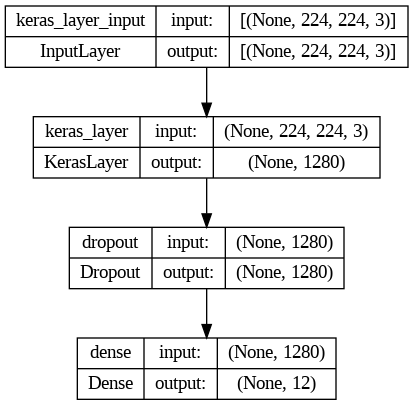

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file = 'convlstm_model_structure_plot.png', show_shapes = True, show_layer_names = True)

In [ ]:
model.compile(
  optimizer=tf.keras.optimizers.Adam(),
  loss='categorical_crossentropy',
  metrics=['acc'])

In [ ]:
%cd /content/drive/My Drive/nlp/ZIMAGES

/content/drive/.shortcut-targets-by-id/1-7EhmGKq8sSPaeoW-EAbmvQJNOa5mLDV/nlp/ZIMAGES


In [ ]:
!pwd

/content/drive/.shortcut-targets-by-id/1-7EhmGKq8sSPaeoW-EAbmvQJNOa5mLDV/nlp/ZIMAGES


In [ ]:
# Run model training

steps_per_epoch = np.ceil(train_generator.samples/train_generator.batch_size)
val_steps_per_epoch = np.ceil(valid_generator.samples/valid_generator.batch_size)

hist = model.fit(
    train_generator,
    epochs=50,
    verbose=1,
    steps_per_epoch=steps_per_epoch,
    validation_data=valid_generator,
    validation_steps=val_steps_per_epoch).history

Epoch 1/50
5/5 [==============================] - 54s 9s/step - loss: 2.8244 - acc: 0.1111 - val_loss: 2.3131 - val_acc: 0.2414
Epoch 2/50
5/5 [==============================] - 2s 326ms/step - loss: 2.5667 - acc: 0.1667 - val_loss: 2.1711 - val_acc: 0.2069
Epoch 3/50
5/5 [==============================] - 2s 366ms/step - loss: 2.4244 - acc: 0.1597 - val_loss: 2.0477 - val_acc: 0.2069
Epoch 4/50
5/5 [==============================] - 2s 423ms/step - loss: 2.1969 - acc: 0.2014 - val_loss: 1.9388 - val_acc: 0.2759
Epoch 5/50
5/5 [==============================] - 2s 396ms/step - loss: 2.0716 - acc: 0.2361 - val_loss: 1.8455 - val_acc: 0.3793
Epoch 6/50
5/5 [==============================] - 2s 314ms/step - loss: 1.9741 - acc: 0.3403 - val_loss: 1.7797 - val_acc: 0.4483
Epoch 7/50
5/5 [==============================] - 2s 308ms/step - loss: 1.8877 - acc: 0.3333 - val_loss: 1.7113 - val_acc: 0.4483
Epoch 8/50
5/5 [==============================] - 2s 313ms/step - loss: 1.7733 - acc: 0.3889

In [ ]:
# Measure accuracy and loss after training

final_loss, final_accuracy = model.evaluate(valid_generator, steps = val_steps_per_epoch)

1/1 [==============================] - 0s 297ms/step - loss: 1.0725 - acc: 0.6207


In [ ]:
print("Final loss: {:.2f}".format(final_loss))
print("Final accuracy: {:.2f}%".format(final_accuracy * 100))

Final loss: 1.07
Final accuracy: 62.07%


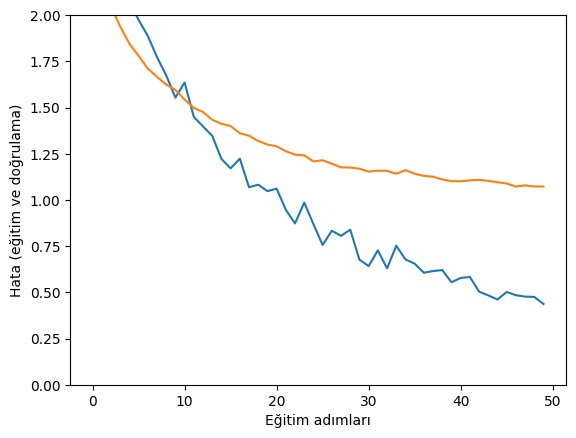

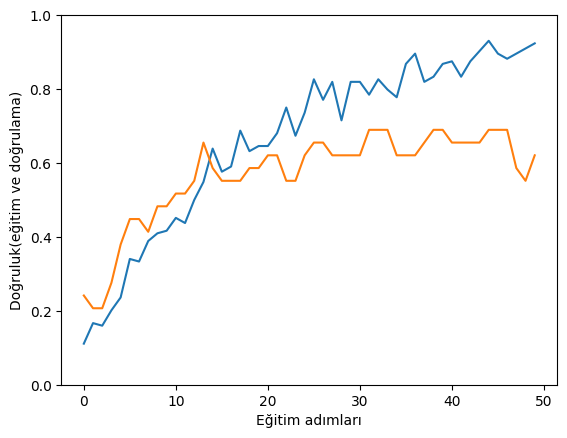

In [ ]:
# Visualize training process

plt.figure()
plt.ylabel("Hata (eğitim ve doğrulama)")
plt.xlabel("Eğitim adımları")
plt.ylim([0,2])
plt.plot(hist["loss"])
plt.plot(hist["val_loss"])
plt.savefig("loss.png")

plt.figure()
plt.ylabel("Doğruluk(eğitim ve doğrulama)")
plt.xlabel("Eğitim adımları")
plt.ylim([0,1])
plt.plot(hist["acc"])
plt.plot(hist["val_acc"])
plt.savefig("acc.png")

In [ ]:
#export model
from tensorflow import keras
pth3 = "/content/drive/My Drive/nlp/Modeller/snf"
model.save(pth3)
#tf.keras.experimental.export_saved_model(model, FLOWERS_SAVED_MODEL)

In [ ]:
steps_per_epoch = np.ceil(train_generator.samples/train_generator.batch_size)
val_steps_per_epoch = np.ceil(valid_generator.samples/valid_generator.batch_size)
hist = model.fit(
train_generator,
epochs=500,
verbose=1,
steps_per_epoch=steps_per_epoch,
validation_data=valid_generator,
validation_steps=val_steps_per_epoch).history

Epoch 1/500
5/5 [==============================] - 2s 393ms/step - loss: 0.4585 - acc: 0.9167 - val_loss: 1.0678 - val_acc: 0.6897
Epoch 2/500
5/5 [==============================] - 2s 335ms/step - loss: 0.3656 - acc: 0.9653 - val_loss: 1.0689 - val_acc: 0.6897
Epoch 3/500
5/5 [==============================] - 2s 367ms/step - loss: 0.4446 - acc: 0.9375 - val_loss: 1.0566 - val_acc: 0.6897
Epoch 4/500
5/5 [==============================] - 2s 338ms/step - loss: 0.3633 - acc: 0.9583 - val_loss: 1.0470 - val_acc: 0.6897
Epoch 5/500
5/5 [==============================] - 2s 357ms/step - loss: 0.4308 - acc: 0.9167 - val_loss: 1.0535 - val_acc: 0.6897
Epoch 6/500
5/5 [==============================] - 2s 327ms/step - loss: 0.3714 - acc: 0.9306 - val_loss: 1.0511 - val_acc: 0.6897
Epoch 7/500
5/5 [==============================] - 2s 320ms/step - loss: 0.3657 - acc: 0.9722 - val_loss: 1.0473 - val_acc: 0.6897
Epoch 8/500
5/5 [==============================] - 2s 317ms/step - loss: 0.3672 - a

1/1 [==============================] - 0s 330ms/step - loss: 1.0904 - acc: 0.6897
Final loss: 1.09
Final accuracy: 68.97%


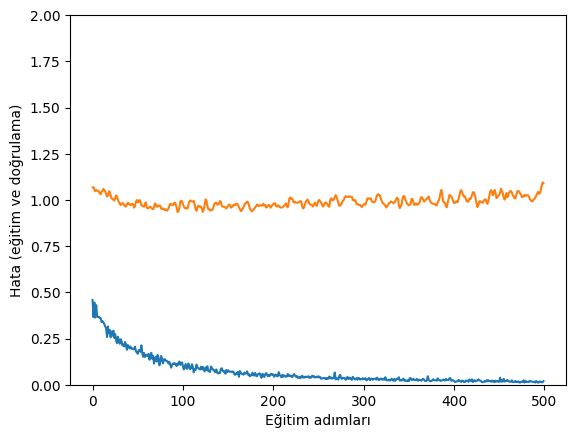

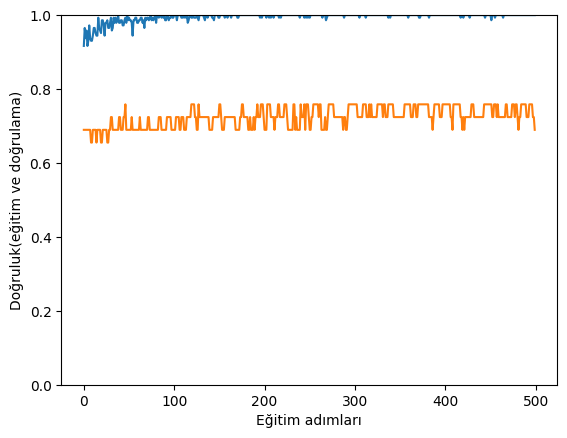

In [ ]:
final_loss, final_accuracy = model.evaluate(valid_generator, steps = val_steps_per_epoch)
print("Final loss: {:.2f}".format(final_loss))
print("Final accuracy: {:.2f}%".format(final_accuracy * 100))
plt.figure()
plt.ylabel("Hata (eğitim ve doğrulama)")
plt.xlabel("Eğitim adımları")
plt.ylim([0,2])
plt.plot(hist["loss"])
plt.plot(hist["val_loss"])
plt.savefig("loss2.png")

plt.figure()
plt.ylabel("Doğruluk(eğitim ve doğrulama)")
plt.xlabel("Eğitim adımları")
plt.ylim([0,1])
plt.plot(hist["acc"])
plt.plot(hist["val_acc"])
plt.savefig("acc2.png")


In [ ]:
from tensorflow import keras

In [ ]:
SHOE_SAVED_MODEL = "saved_models/shoe"
tf.keras.models.save_model(model, SHOE_SAVED_MODEL)
shoe_model = tf.keras.models.load_model(SHOE_SAVED_MODEL,
custom_objects={'KerasLayer':hub.KerasLayer})

In [ ]:
val_image_batch, val_label_batch = next(iter(valid_generator))
true_label_ids = np.argmax(val_label_batch, axis=-1)
print("Validation batch shape:", val_image_batch.shape)

Validation batch shape: (29, 224, 224, 3)


1/1 [==============================] - 1s 537ms/step
Prediction results shape: (29, 12)


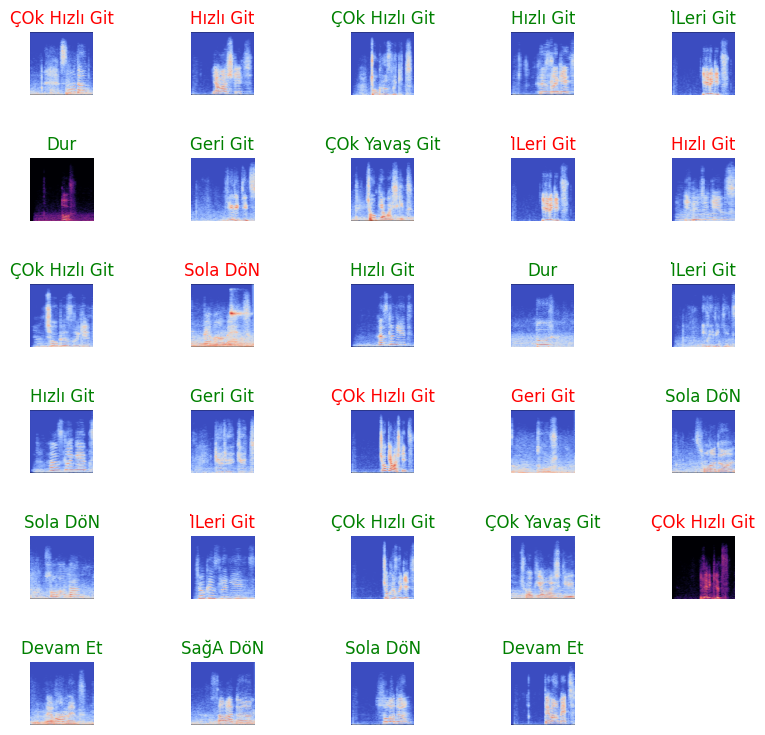

In [ ]:
tf_model_predictions = shoe_model.predict(val_image_batch)
print("Prediction results shape:", tf_model_predictions.shape)
predicted_ids = np.argmax(tf_model_predictions, axis=-1)
predicted_labels = dataset_labels[predicted_ids]
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=1)
for n in range(29):
  plt.subplot(6,5,n+1)
  plt.imshow(val_image_batch[n])
  color = "green" if predicted_ids[n] == true_label_ids[n] else "red"
  plt.title(predicted_labels[n].title(), color=color)
  plt.axis('off')

In [ ]:
#flowers_model = tf.keras.experimental.load_from_saved_model(shoe_model,custom_objects={'KerasLayer':hub.KerasLayer})
flowers_model = keras.models.load_model("/content/drive/My Drive/nlp/Modeller/snf")

In [ ]:
# Get images and labels batch from validation dataset generator

val_image_batch, val_label_batch = next(iter(valid_generator))
true_label_ids = np.argmax(val_label_batch, axis=-1)

print("Validation batch shape:", val_image_batch.shape)

Validation batch shape: (29, 224, 224, 3)


In [ ]:
tf_model_predictions = shoe_model.predict(val_image_batch)
print("Prediction results shape:", tf_model_predictions.shape)

1/1 [==============================] - 0s 33ms/step
Prediction results shape: (29, 12)


In [ ]:
predicted_ids = np.argmax(tf_model_predictions, axis=-1)
predicted_labels = dataset_labels[predicted_ids]

In [ ]:
# Convert prediction results to Pandas dataframe, for better visualization

tf_pred_dataframe = pd.DataFrame(tf_model_predictions)
tf_pred_dataframe.columns = dataset_labels

print("Prediction results for the first elements")
tf_pred_dataframe.head()

Prediction results for the first elements


,ÇOk Hızlı Git,ÇOk Yavaş Git,Devam Et,Dur,Geri Git,Hızlı Git,İLeri Git,Modeller,SağA DöN,Sola DöN,Yavaş Git,Saved_Models
0,0.52934116,0.00948628,0.01462433,0.01358694,0.09136767,0.12931155,0.08064179,0.00000092,0.00000984,0.12795094,0.00357295,0.00010567
1,0.00702968,0.01450849,0.01209319,0.00009732,0.80869961,0.00029778,0.15671942,0.00000048,0.00026992,0.00005389,0.00021033,0.00001994
2,0.03371634,0.00065400,0.01031843,0.00008537,0.00026918,0.34656405,0.00000952,0.00000005,0.00000067,0.26393956,0.34444147,0.00000134
3,0.00157261,0.00049463,0.00039110,0.00001699,0.00364534,0.91586256,0.01070676,0.00000020,0.00000055,0.06727047,0.00003597,0.00000271
4,0.00003906,0.00005870,0.00194744,0.02299311,0.00521277,0.00582354,0.03373318,0.00000209,0.00253167,0.92691505,0.00073327,0.00001005


In [ ]:
tf_pred_dataframe

,ÇOk Hızlı Git,ÇOk Yavaş Git,Devam Et,Dur,Geri Git,Hızlı Git,İLeri Git,Modeller,SağA DöN,Sola DöN,Yavaş Git,Saved_Models
0,0.52934116,9.48628411e-03,0.01462433,1.35869393e-02,0.09136767,0.12931155,0.08064179,9.18692251e-07,9.84334019e-06,0.12795094,0.00357295,1.05670057e-04
1,0.00702968,1.45084942e-02,0.01209319,9.73241185e-05,0.80869961,0.00029778,0.15671942,4.76953005e-07,2.69919430e-04,0.00005389,0.00021033,1.99444985e-05
2,0.03371634,6.53998170e-04,0.01031843,8.53712918e-05,0.00026918,0.34656405,0.00000952,5.32359330e-08,6.65198229e-07,0.26393956,0.34444147,1.34388586e-06
3,0.00157261,4.94627282e-04,0.00039110,1.69868254e-05,0.00364534,0.91586256,0.01070676,1.97719800e-07,5.51054825e-07,0.06727047,0.00003597,2.70625537e-06
4,0.00003906,5.87048271e-05,0.00194744,2.29931120e-02,0.00521277,0.00582354,0.03373318,2.08999654e-06,2.53167120e-03,0.92691505,0.00073327,1.00491134e-05
5,0.00231985,2.55625024e-02,0.59549445,2.16056986e-04,0.00251043,0.15192711,0.00335783,1.49143079e-06,3.98784457e-03,0.20819786,0.00640509,1.94889053e-05
6,0.00000029,5.96956817e-10,0.00008606,9.93999839e-01,0.00364262,0.00000739,0.00212112,2.55138186e-08,4.86472454e-05,0.00009189,0.00000205,1.71693443e-07
7,0.00000379,7.09814998e-08,0.00001888,9.95022178e-01,0.00002071,0.00001768,0.00395991,1.97508655e-07,2.48633114e-07,0.00040684,0.00054929,8.57272298e-08
8,0.89674699,9.85422879e-02,0.00019558,2.29440229e-06,0.00438539,0.00000468,0.00008728,1.43736534e-09,5.59912792e-08,0.00000047,0.00003472,2.54125496e-07
9,0.00000126,1.20508121e-05,0.00079067,1.32430505e-04,0.00005696,0.00003027,0.00010465,1.25810089e-07,1.13119446e-01,0.88550347,0.00024818,5.62592390e-07


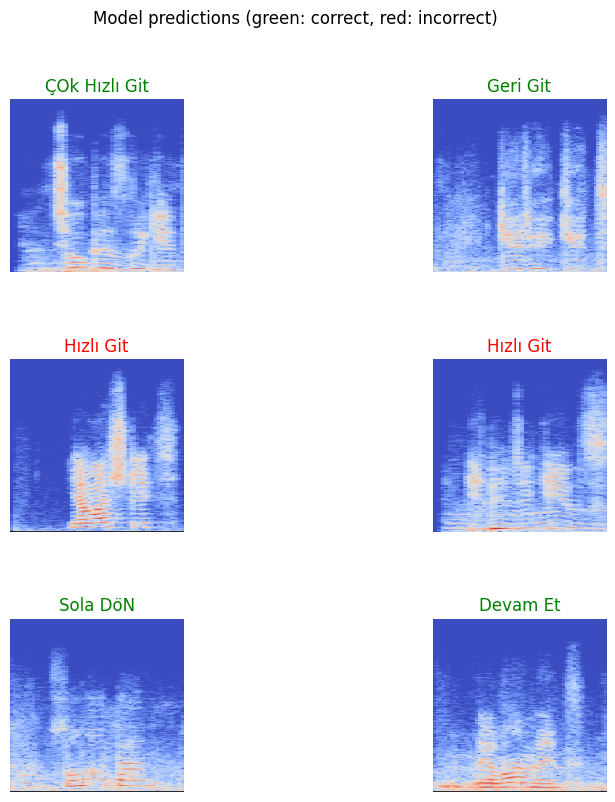

In [ ]:
# Print images batch and labels predictions

plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for n in range(6):
  plt.subplot(3,2,n+1)
  plt.imshow(val_image_batch[n])
  color = "green" if predicted_ids[n] == true_label_ids[n] else "red"
  plt.title(predicted_labels[n].title(), color=color)
  plt.axis('off')
_ = plt.suptitle("Model predictions (green: correct, red: incorrect)")